In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import io
from contextlib import redirect_stdout, redirect_stderr

from collections import defaultdict
import matplotlib as mpl
import numpy as np
import powerlaw

params = {'axes.labelsize': 20,
         'axes.titlesize':20,
         'xtick.labelsize':12,
         'ytick.labelsize':15,
         'axes.titlepad': 1,
         'axes.labelpad': 1,
         'axes.grid': True,
          'legend.fontsize': 15
    }
mpl.rcParams.update(params)

import numpy as np
import matplotlib.pyplot as plt
import random
import os
from mpl_toolkits.axes_grid1 import make_axes_locatable

import warnings
import matplotlib.cbook

from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import json
import math

# c = 'steelblue'
# base_c = 'lightskyblue'
import seaborn as sns
c = 'coral'
c1 = 'yellowgreen'
base_c = 'aqua'

plt.rcParams['text.usetex'] = False
sns.set(style="ticks")
plt.rc('font', family='serif')
plt.rc('font', serif='STIXGeneral')

yaxisfont=45
bigfont = 27 + 5
medfont = 15 
smallfont = 17

plt.rcParams['xtick.labelsize']=medfont
plt.rcParams['ytick.labelsize']=medfont
plt.rcParams['axes.titlesize']=medfont

sns.set_style('ticks', {'font.family':'serif', 'font.serif':'Times New Roman', 'font.size': 16})

sns.set_palette("muted")
cmap = sns.color_palette("tab10")
ticks_fontsize = 18
label_fontsize = 20
cbar_fontsize = 18


EVALS_THRESH = 0.00001
thresh = EVALS_THRESH
XMIN_PEAK = 'xmin_peak'
XMIN_MID = 'xmin_mid'
POWER_LAW = 'power_law'
TRUNCATED_POWER_LAW='truncated_power_law'

def pl_fit(data=None, xmin=None, xmax=None, verbose=False, distribution='PL'):
    f = io.StringIO()
    with redirect_stdout(f), redirect_stderr(f), warnings.catch_warnings():
        warnings.simplefilter(action='ignore', category=RuntimeWarning)
        return powerlaw.Fit(data, xmin=xmin, xmax=xmax, 
                verbose=verbose, distribution=distribution, 
                xmin_distribution=distribution)

def plot_loghist(ax, x, bins, xmin, legend, color):
    hist, bins = np.histogram(x, bins=bins)
    logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
    ax.hist(x, bins=logbins, density=True, alpha=0.2, label=legend, color=color)

    if xmin:
        ax.axvline(xmin, color=color, label=r'$\lambda_{min}$')

    ax.set_xscale('log')

['encoder.layers.0.self_attn.k_proj', 'encoder.layers.0.self_attn.v_proj', 'encoder.layers.0.self_attn.q_proj', 'encoder.layers.0.self_attn.out_proj', 'encoder.layers.0.fc1', 'encoder.layers.0.fc2', 'encoder.layers.1.self_attn.k_proj', 'encoder.layers.1.self_attn.v_proj', 'encoder.layers.1.self_attn.q_proj', 'encoder.layers.1.self_attn.out_proj', 'encoder.layers.1.fc1', 'encoder.layers.1.fc2', 'encoder.layers.2.self_attn.k_proj', 'encoder.layers.2.self_attn.v_proj', 'encoder.layers.2.self_attn.q_proj', 'encoder.layers.2.self_attn.out_proj', 'encoder.layers.2.fc1', 'encoder.layers.2.fc2', 'encoder.layers.3.self_attn.k_proj', 'encoder.layers.3.self_attn.v_proj', 'encoder.layers.3.self_attn.q_proj', 'encoder.layers.3.self_attn.out_proj', 'encoder.layers.3.fc1', 'encoder.layers.3.fc2', 'encoder.layers.4.self_attn.k_proj', 'encoder.layers.4.self_attn.v_proj', 'encoder.layers.4.self_attn.q_proj', 'encoder.layers.4.self_attn.out_proj', 'encoder.layers.4.fc1', 'encoder.layers.4.fc2', 'encoder.

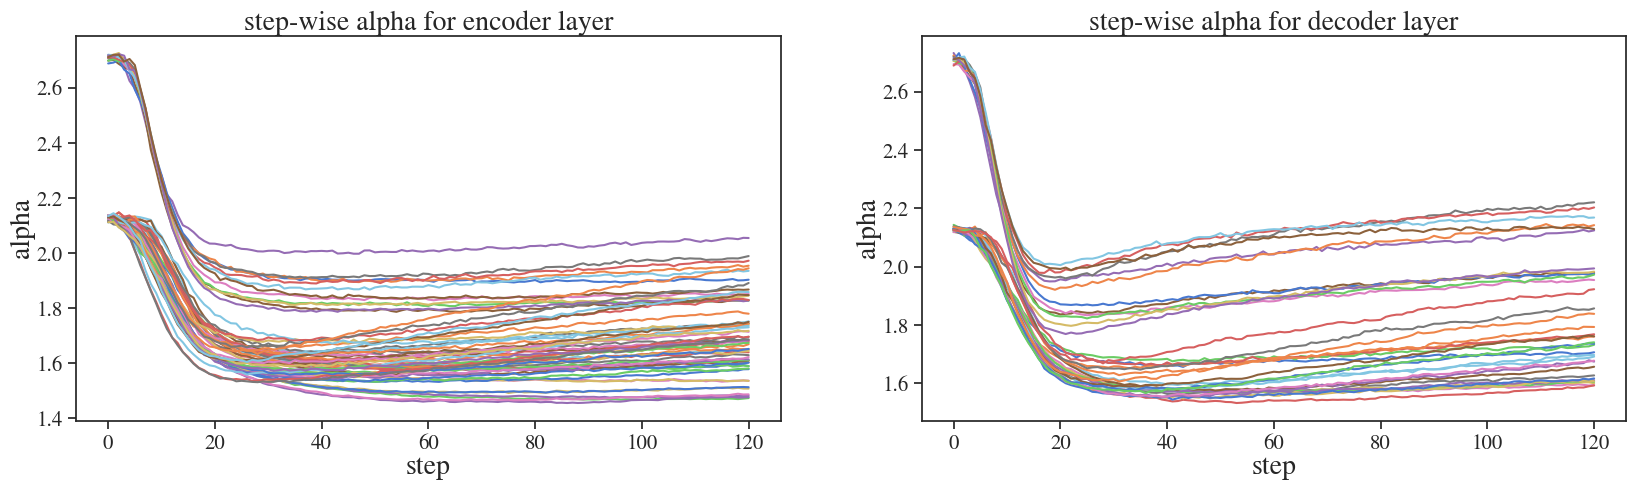

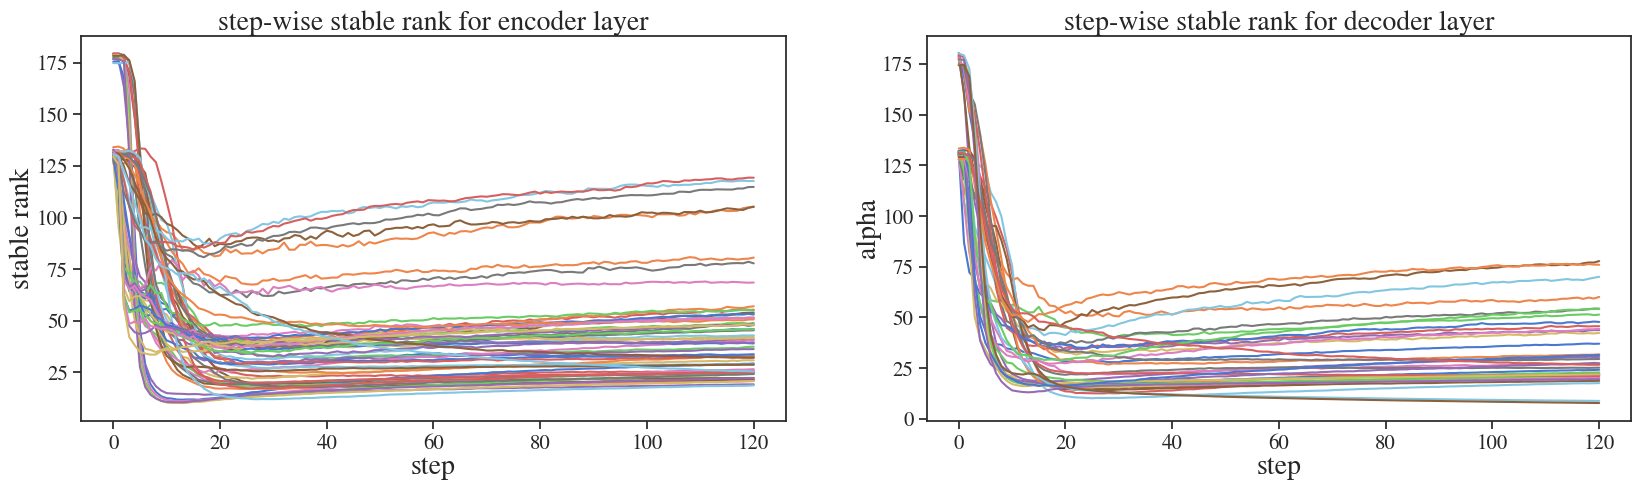

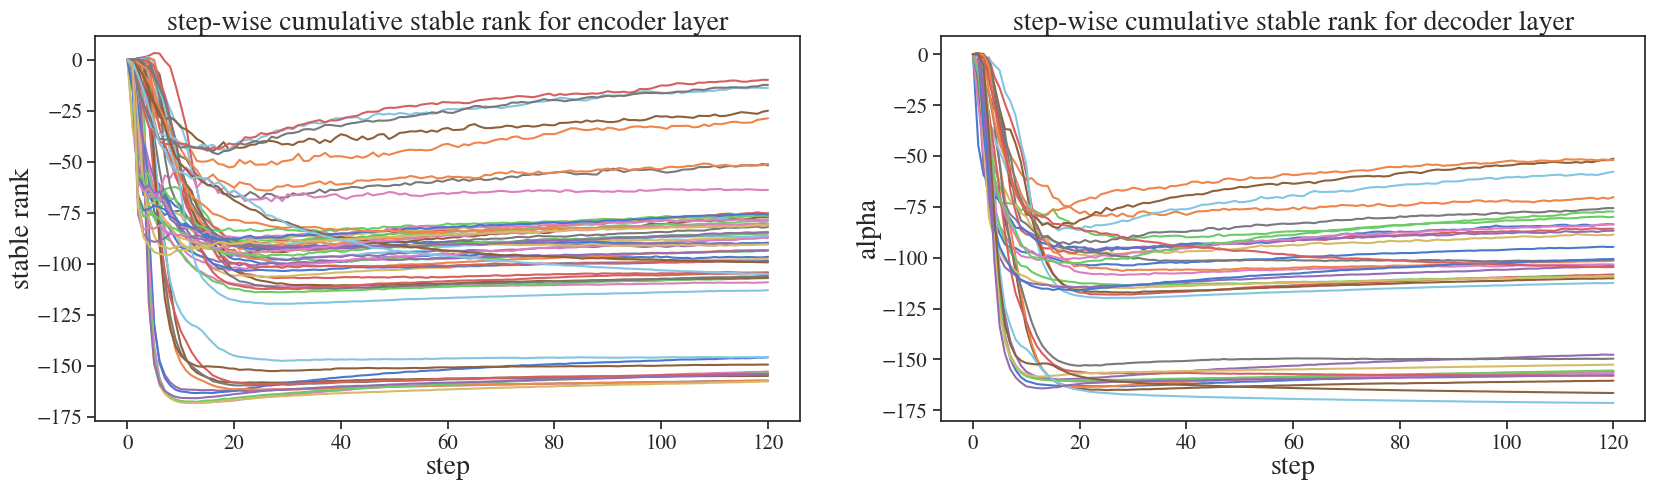

In [6]:
base_dir = '/scratch/tpang/zhliu/checkpoints/nlp/mt/iwslt14_de_en/baseline'

seed_list = [43]


stable_rank_list = []
norm_stable_rank_list = []
alpha_list = []
for step in range(0, 60500, 500):
    step_stable_rank_list = []
    step_norm_stable_rank_list = []
    step_alpha_list = []
    for seed in seed_list:
        seed_dir = os.path.join(base_dir, f'transformer_iwslt_de_en_v2_iwslt14_de_en_seed{seed}')
        seed_stable_rank_list = []
        seed_norm_stable_rank_list = []
        seed_step_esd = np.load(os.path.join(seed_dir, f'metrics_update{step}.npy'), allow_pickle=True).item()
        layer_names = seed_step_esd['longname']
        for idx, (name, eigs) in enumerate(zip(seed_step_esd['longname'], seed_step_esd['eigs'])):
            eigs_sum = np.sum(eigs)
            max_eig = max(eigs)
            seed_stable_rank = eigs_sum / max_eig
            seed_norm_stable_rank = (eigs_sum / max_eig) / len(eigs)
            seed_stable_rank_list.append(seed_stable_rank)
            seed_norm_stable_rank_list.append(seed_norm_stable_rank)

        step_alpha_list.append(seed_step_esd['alpha'])
        step_stable_rank_list.append(seed_stable_rank_list)
        step_norm_stable_rank_list.append(seed_norm_stable_rank_list)

    step_alpha_list = np.array(step_alpha_list)
    step_stable_rank_list = np.array(step_stable_rank_list)
    step_norm_stable_rank_list = np.array(step_norm_stable_rank_list)

    alpha_list.append(np.mean(step_alpha_list, axis=0))
    stable_rank_list.append(np.mean(step_stable_rank_list, axis=0))
    norm_stable_rank_list.append(np.mean(step_norm_stable_rank_list, axis=0))

print(layer_names)
alpha_list = np.array(alpha_list)
stable_rank_list = np.array(stable_rank_list)
norm_stable_rank_list = np.array(norm_stable_rank_list)
print(stable_rank_list.shape)

fig, axs = plt.subplots(1, 2, figsize=(20, 5))
for layer_idx in range(alpha_list.shape[1]):
    step_alpha = alpha_list[:, layer_idx]
    layer_name = layer_names[layer_idx]
    if 'encoder' in layer_name:
        axs[0].plot(step_alpha, label=layer_name)
    else:
        axs[1].plot(step_alpha, label=layer_name)

axs[0].set_xlabel('step', fontsize=20)
axs[0].set_ylabel('alpha', fontsize=20)
axs[0].set_title(f'step-wise alpha for encoder layer', fontsize=20)

axs[1].set_xlabel('step', fontsize=20)
axs[1].set_ylabel('alpha', fontsize=20)
axs[1].set_title(f'step-wise alpha for decoder layer', fontsize=20)
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(20, 5))
for layer_idx in range(stable_rank_list.shape[1]):
    step_stable_rank = stable_rank_list[:, layer_idx]
    layer_name = layer_names[layer_idx]
    if 'encoder' in layer_name:
        axs[0].plot(step_stable_rank, label=layer_name)
    else:
        axs[1].plot(step_stable_rank, label=layer_name)

axs[0].set_xlabel('step', fontsize=20)
axs[0].set_ylabel('stable rank', fontsize=20)
axs[0].set_title(f'step-wise stable rank for encoder layer', fontsize=20)

axs[1].set_xlabel('step', fontsize=20)
axs[1].set_ylabel('alpha', fontsize=20)
axs[1].set_title(f'step-wise stable rank for decoder layer', fontsize=20)
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(20, 5))
for layer_idx in range(stable_rank_list.shape[1]):
    step_cul_stable_rank = stable_rank_list[:, layer_idx] - stable_rank_list[0, layer_idx]
    layer_name = layer_names[layer_idx]
    if 'encoder' in layer_name:
        axs[0].plot(step_cul_stable_rank, label=layer_name)
    else:
        axs[1].plot(step_cul_stable_rank, label=layer_name)

axs[0].set_xlabel('step', fontsize=20)
axs[0].set_ylabel('stable rank', fontsize=20)
axs[0].set_title(f'step-wise cumulative stable rank for encoder layer', fontsize=20)

axs[1].set_xlabel('step', fontsize=20)
axs[1].set_ylabel('alpha', fontsize=20)
axs[1].set_title(f'step-wise cumulative stable rank for decoder layer', fontsize=20)
plt.show()

# plt.figure(figsize=(15, 8))
# for layer_idx in range(norm_stable_rank_list.shape[1]):
#     step_norm_stable_rank = norm_stable_rank_list[:, layer_idx]
#     plt.plot(step_norm_stable_rank, label=layer_names[layer_idx])

# plt.xlabel('step', fontsize=20)
# plt.ylabel('normalized stable rank', fontsize=20)
# plt.title('step-wise normalized stable rank for each layer in ResNet-18', fontsize=20)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
# plt.show()

# plt.figure(figsize=(15, 8))
# for layer_idx in range(norm_stable_rank_list.shape[1]):
#     step_norm_stable_rank = np.array(norm_stable_rank_list[:, layer_idx])
#     step_norm_stable_rank = step_norm_stable_rank / step_norm_stable_rank[0]
#     plt.plot(step_norm_stable_rank, label=layer_names[layer_idx])

# plt.xlabel('step', fontsize=20)
# plt.ylabel('init normalized stable rank', fontsize=20)
# plt.title('step-wise normalized stable rank for each layer in ResNet-18', fontsize=20)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
# plt.show()
            

# plt.figure(figsize=(15, 8))
# alpha_stable_rank = []
# alpha_norm_stable_rank = []
# for step in range(alpha_list.shape[0]):
#     step_alpha = alpha_list[step, :]
#     step_stable_rank = stable_rank_list[step, :]
#     step_norm_stable_rank = norm_stable_rank_list[step, :]
    
#     # calculate the spearman rank
#     alpha_stable_rank.append(spearmanr(step_alpha, step_stable_rank)[0])
#     alpha_norm_stable_rank.append(spearmanr(step_alpha, step_norm_stable_rank)[0])

# # plot
# plt.plot(alpha_stable_rank, label='alpha & stable rank')
# plt.plot(alpha_norm_stable_rank, label='alpha & norm stable rank')
# plt.legend()
# plt.xlabel('step', fontsize=20)
# plt.ylabel('spearman rank', fontsize=20)
# plt.title('step-wise spearman rank between alpha and stable rank', fontsize=20)
# plt.show()


['encoder.layers.0.self_attn.k_proj', 'encoder.layers.0.self_attn.v_proj', 'encoder.layers.0.self_attn.q_proj', 'encoder.layers.0.self_attn.out_proj', 'encoder.layers.0.fc1', 'encoder.layers.0.fc2', 'encoder.layers.1.self_attn.k_proj', 'encoder.layers.1.self_attn.v_proj', 'encoder.layers.1.self_attn.q_proj', 'encoder.layers.1.self_attn.out_proj', 'encoder.layers.1.fc1', 'encoder.layers.1.fc2', 'encoder.layers.2.self_attn.k_proj', 'encoder.layers.2.self_attn.v_proj', 'encoder.layers.2.self_attn.q_proj', 'encoder.layers.2.self_attn.out_proj', 'encoder.layers.2.fc1', 'encoder.layers.2.fc2', 'encoder.layers.3.self_attn.k_proj', 'encoder.layers.3.self_attn.v_proj', 'encoder.layers.3.self_attn.q_proj', 'encoder.layers.3.self_attn.out_proj', 'encoder.layers.3.fc1', 'encoder.layers.3.fc2', 'encoder.layers.4.self_attn.k_proj', 'encoder.layers.4.self_attn.v_proj', 'encoder.layers.4.self_attn.q_proj', 'encoder.layers.4.self_attn.out_proj', 'encoder.layers.4.fc1', 'encoder.layers.4.fc2', 'encoder.

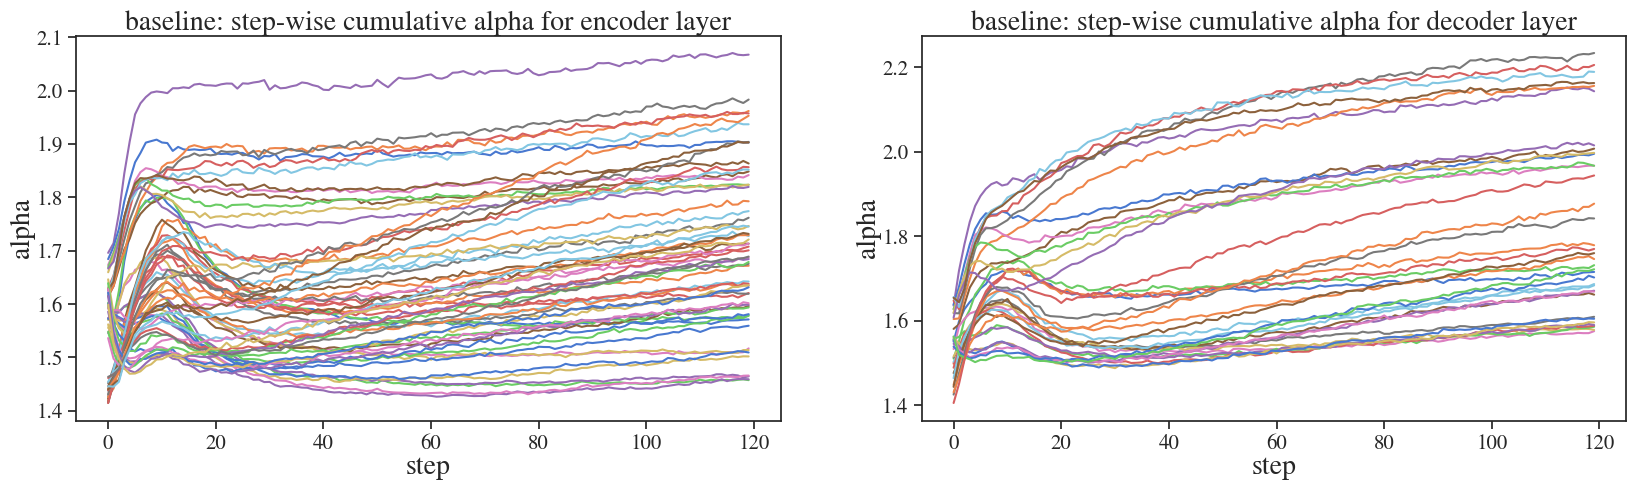

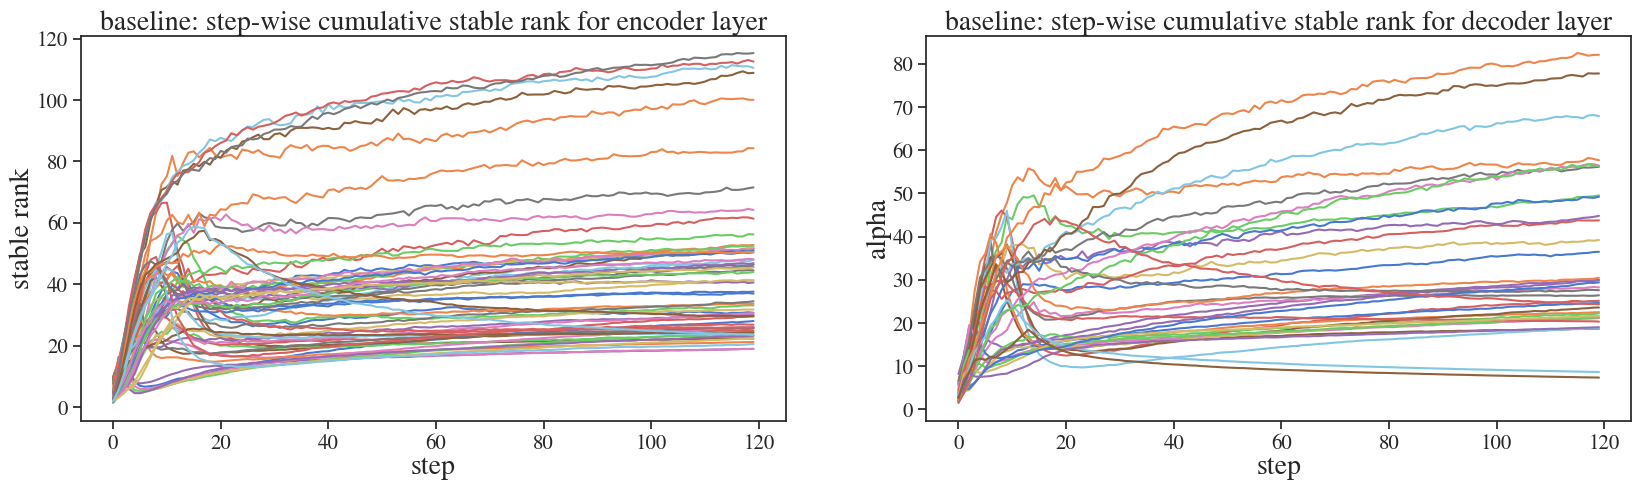

,layer_names,stable_rank
0,decoder.layers.5.fc2,7.369002
1,decoder.layers.4.fc2,8.664832
2,decoder.layers.0.fc2,18.667953
3,decoder.layers.1.self_attn.out_proj,18.729683
4,encoder.layers.1.self_attn.k_proj,18.957846
...,...,...
91,encoder.layers.0.self_attn.v_proj,100.048126
92,decoder.layers.2.encoder_attn.v_proj,108.840309
93,decoder.layers.3.encoder_attn.v_proj,110.467751
94,decoder.layers.4.encoder_attn.v_proj,112.518227


['encoder.layers.0.self_attn.k_proj', 'encoder.layers.0.self_attn.v_proj', 'encoder.layers.0.self_attn.q_proj', 'encoder.layers.0.self_attn.out_proj', 'encoder.layers.0.fc1', 'encoder.layers.0.fc2', 'encoder.layers.1.self_attn.k_proj', 'encoder.layers.1.self_attn.v_proj', 'encoder.layers.1.self_attn.q_proj', 'encoder.layers.1.self_attn.out_proj', 'encoder.layers.1.fc1', 'encoder.layers.1.fc2', 'encoder.layers.2.self_attn.k_proj', 'encoder.layers.2.self_attn.v_proj', 'encoder.layers.2.self_attn.q_proj', 'encoder.layers.2.self_attn.out_proj', 'encoder.layers.2.fc1', 'encoder.layers.2.fc2', 'encoder.layers.3.self_attn.k_proj', 'encoder.layers.3.self_attn.v_proj', 'encoder.layers.3.self_attn.q_proj', 'encoder.layers.3.self_attn.out_proj', 'encoder.layers.3.fc1', 'encoder.layers.3.fc2', 'encoder.layers.4.self_attn.k_proj', 'encoder.layers.4.self_attn.v_proj', 'encoder.layers.4.self_attn.q_proj', 'encoder.layers.4.self_attn.out_proj', 'encoder.layers.4.fc1', 'encoder.layers.4.fc2', 'encoder.

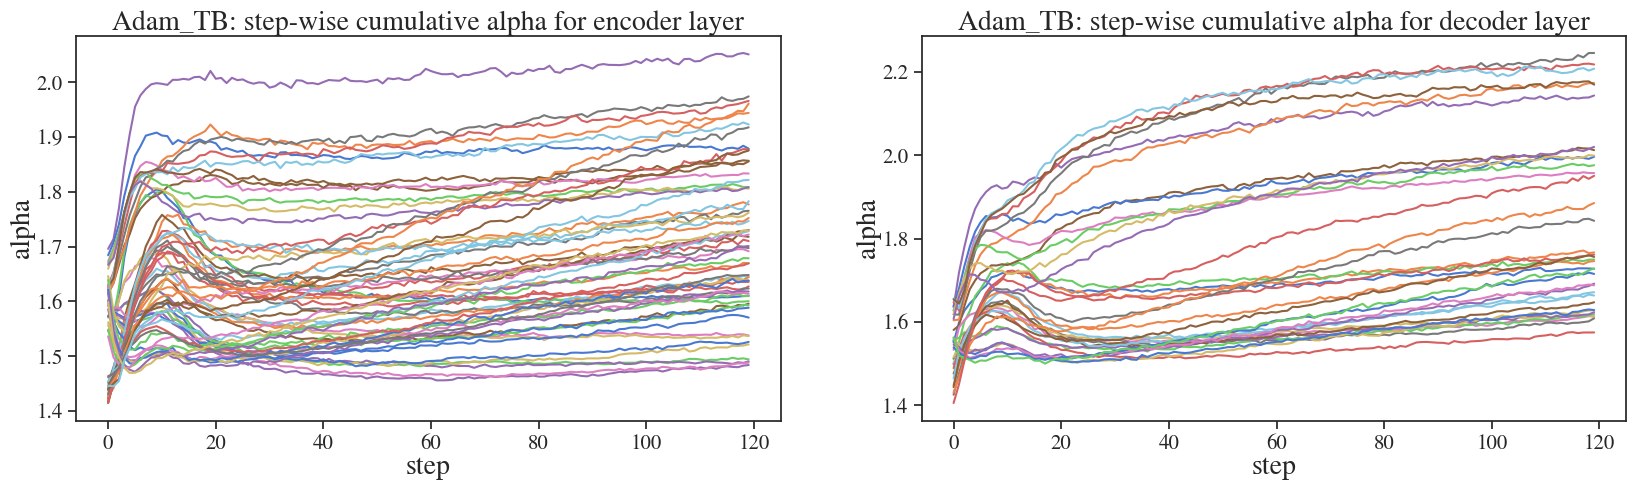

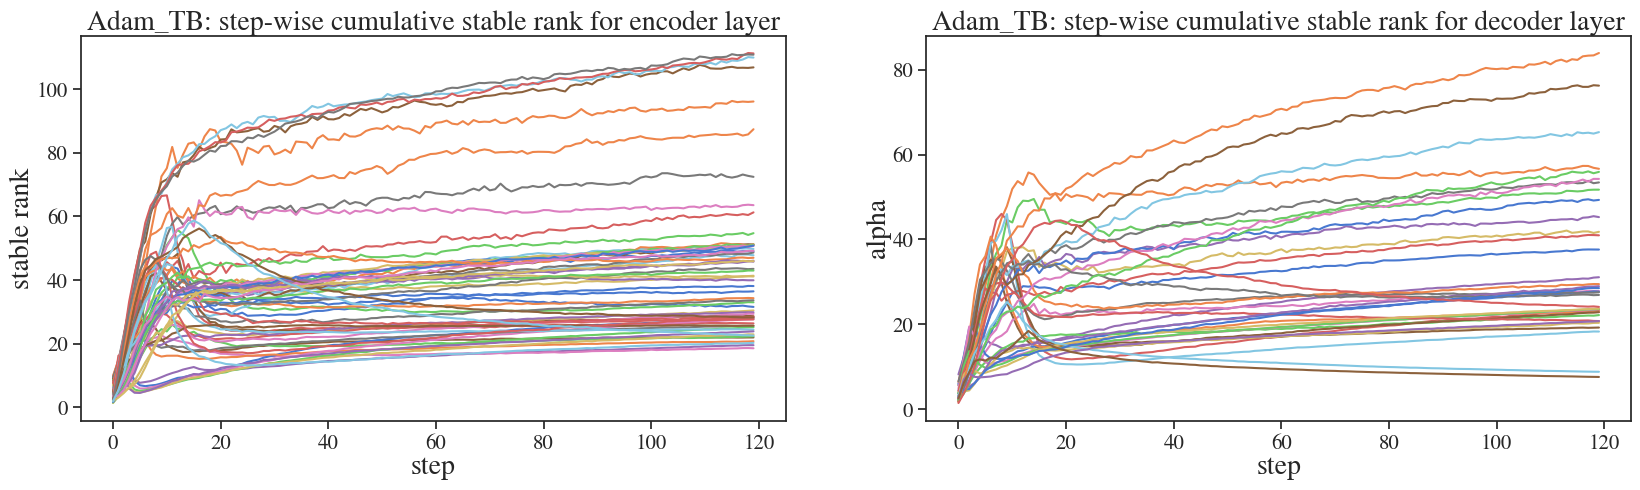

,layer_names,stable_rank
0,decoder.layers.5.fc2,7.615538
1,decoder.layers.4.fc2,8.838735
2,decoder.layers.1.self_attn.out_proj,18.309284
3,encoder.layers.1.self_attn.k_proj,18.570034
4,decoder.layers.0.fc2,19.249760
...,...,...
91,encoder.layers.0.self_attn.v_proj,96.120537
92,decoder.layers.2.encoder_attn.v_proj,106.843361
93,decoder.layers.3.encoder_attn.v_proj,109.927650
94,decoder.layers.5.encoder_attn.v_proj,110.832970


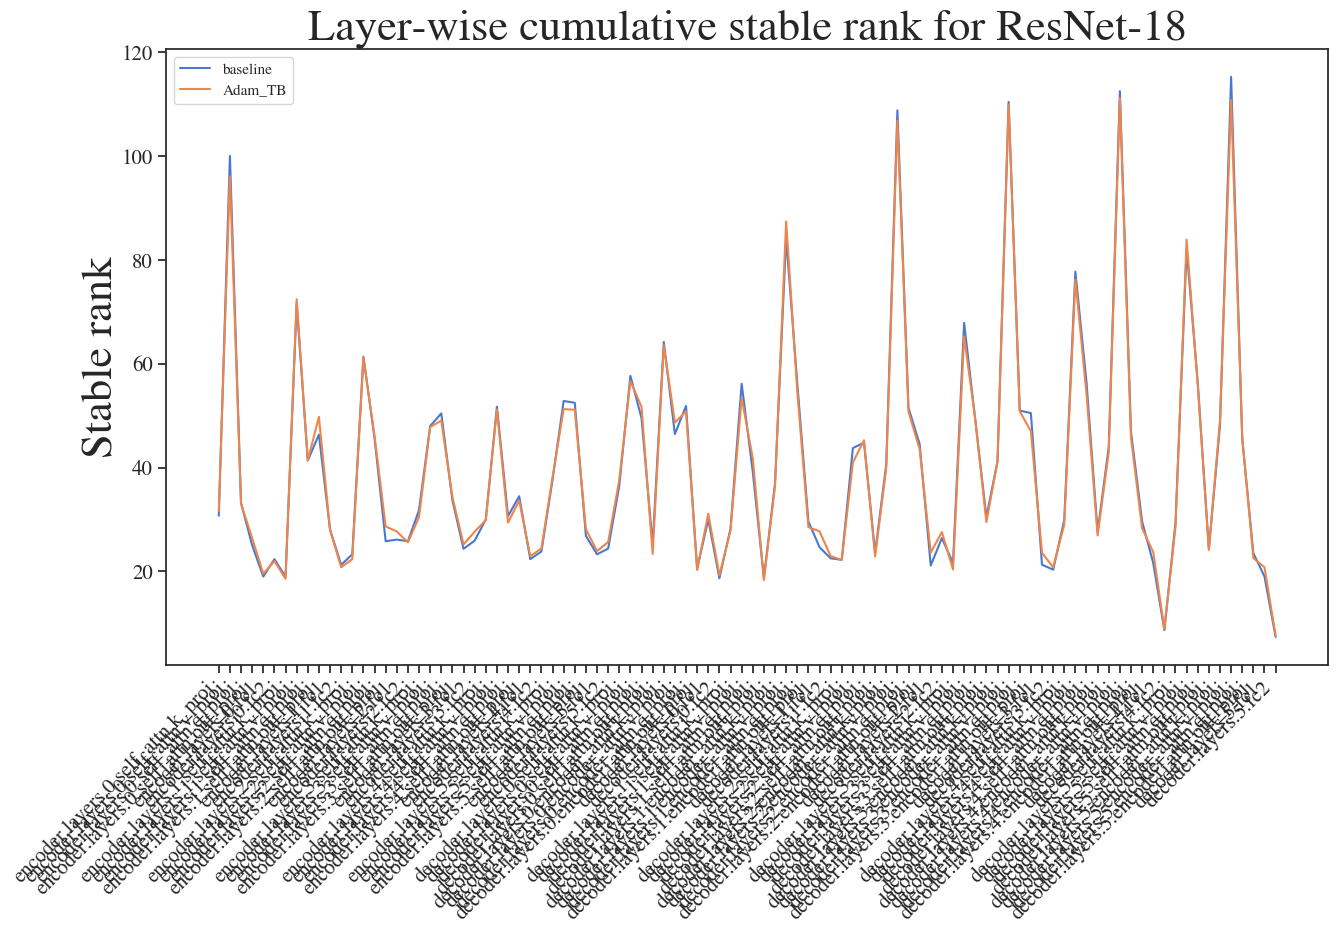

In [11]:
dir_dict = {
    'baseline': '/scratch/tpang/zhliu/checkpoints/nlp/mt/iwslt14_de_en/baseline/transformer_iwslt_de_en_v2_iwslt14_de_en_seed43',
    'Adam_TB': '/scratch/tpang/zhliu/checkpoints/nlp/mt/iwslt14_de_en/adam_tb/transformer_iwslt_de_en_v2_iwslt14_de_en_seed43/after_warmup_True_tb_linear_map_alpha/min_0.6_slope0.8_xmin_mid_mid_pos2'
}

seed_list = [43]
lr = 0.1
results = {}

for method in dir_dict.keys():
    base_dir = dir_dict[method]
    stable_rank_list = []
    norm_stable_rank_list = []
    alpha_list = []
    for step in range(500, 60500, 500):
        step_stable_rank_list = []
        step_norm_stable_rank_list = []
        step_alpha_list = []
        for seed in seed_list:
            seed_dir = base_dir
            seed_stable_rank_list = []
            seed_norm_stable_rank_list = []
            seed_step_esd = np.load(os.path.join(seed_dir, f'cul_metrics_update{step}.npy'), allow_pickle=True).item()
            layer_names = seed_step_esd['longname']
            for idx, (name, eigs) in enumerate(zip(seed_step_esd['longname'], seed_step_esd['eigs'])):
                eigs_sum = np.sum(eigs)
                max_eig = max(eigs)
                seed_stable_rank = eigs_sum / max_eig
                seed_norm_stable_rank = (eigs_sum / max_eig) / len(eigs)
                seed_stable_rank_list.append(seed_stable_rank)
                seed_norm_stable_rank_list.append(seed_norm_stable_rank)

            step_alpha_list.append(seed_step_esd['alpha'])
            step_stable_rank_list.append(seed_stable_rank_list)
            step_norm_stable_rank_list.append(seed_norm_stable_rank_list)

        step_alpha_list = np.array(step_alpha_list)
        step_stable_rank_list = np.array(step_stable_rank_list)
        step_norm_stable_rank_list = np.array(step_norm_stable_rank_list)

        alpha_list.append(np.mean(step_alpha_list, axis=0))
        stable_rank_list.append(np.mean(step_stable_rank_list, axis=0))
        norm_stable_rank_list.append(np.mean(step_norm_stable_rank_list, axis=0))

    print(layer_names)
    alpha_list = np.array(alpha_list)
    stable_rank_list = np.array(stable_rank_list)
    norm_stable_rank_list = np.array(norm_stable_rank_list)
    print(stable_rank_list.shape)

    fig, axs = plt.subplots(1, 2, figsize=(20, 5))
    for layer_idx in range(alpha_list.shape[1]):
        step_alpha = alpha_list[:, layer_idx]
        layer_name = layer_names[layer_idx]
        if 'encoder' in layer_name:
            axs[0].plot(step_alpha, label=layer_name)
        else:
            axs[1].plot(step_alpha, label=layer_name)

    axs[0].set_xlabel('step', fontsize=20)
    axs[0].set_ylabel('alpha', fontsize=20)
    axs[0].set_title(f'{method}: step-wise cumulative alpha for encoder layer', fontsize=20)

    axs[1].set_xlabel('step', fontsize=20)
    axs[1].set_ylabel('alpha', fontsize=20)
    axs[1].set_title(f'{method}: step-wise cumulative alpha for decoder layer', fontsize=20)
    plt.show()

    fig, axs = plt.subplots(1, 2, figsize=(20, 5))
    for layer_idx in range(stable_rank_list.shape[1]):
        step_stable_rank = stable_rank_list[:, layer_idx]
        layer_name = layer_names[layer_idx]
        if 'encoder' in layer_name:
            axs[0].plot(step_stable_rank, label=layer_name)
        else:
            axs[1].plot(step_stable_rank, label=layer_name)

    axs[0].set_xlabel('step', fontsize=20)
    axs[0].set_ylabel('stable rank', fontsize=20)
    axs[0].set_title(f'{method}: step-wise cumulative stable rank for encoder layer', fontsize=20)

    axs[1].set_xlabel('step', fontsize=20)
    axs[1].set_ylabel('alpha', fontsize=20)
    axs[1].set_title(f'{method}: step-wise cumulative stable rank for decoder layer', fontsize=20)
    plt.show()

    # rank layers based on their last-epoch metrics
    last_epoch_alpha = alpha_list[-1, :]
    last_epoch_stable_rank = stable_rank_list[-1, :]

    alpha_rank = np.argsort(last_epoch_alpha)
    stable_rank_rank = np.argsort(last_epoch_stable_rank)

    sorted_results = {
        'layer_names': [layer_names[idx] for idx in stable_rank_rank],
        'stable_rank': [last_epoch_stable_rank[idx] for idx in stable_rank_rank],
    }

    display_df = pd.DataFrame(sorted_results)
    display(display_df)

    results[method] = last_epoch_stable_rank

plt.figure(figsize=(15, 8))
for method in results.keys():
    plt.plot(results[method], label=method)
plt.xticks(np.arange(len(layer_names)), layer_names, rotation=45, ha='right')
plt.ylabel('Stable rank', fontsize=bigfont)
plt.title(f'Layer-wise cumulative stable rank for ResNet-18', fontsize=bigfont)
plt.legend()
plt.show()

plt.figure(figsize=(15, 8))
for method in results.keys():
    plt.plot(results[method]['alpha'], label=method)
plt.xticks(np.arange(len(layer_names)), layer_names, rotation=45, ha='right')
plt.ylabel('Stable rank', fontsize=bigfont)
plt.title(f'Layer-wise cumulative alpha for ResNet-18', fontsize=bigfont)
plt.legend()
plt.show()
    
